In [1]:
"""import the libraries required"""
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""Meta Data"""
"""Define Categories of the Data"""
cat_type_yes_no_h = pd.CategoricalDtype(categories=["हाँ", "नहीं"], ordered=False)
cat_type_eco_status = pd.CategoricalDtype(categories=["BPL", "APL"], ordered=False)
cat_type_sub_cat = pd.CategoricalDtype(categories=["Small & Marginal Farmers", 
                                                   "Other",
                                                  "GENERAL",
                                                  "ST",
                                                  "SC",
                                                  "Landless with homestead",
                                                   "Women Headed HH",
                                                   "PH"], ordered=False)
cat_type_toilet_type_h = pd.CategoricalDtype(categories=["दो गड्ढे वाला",
                                                       "सेप्टिक टैंक",
                                                       "एक गड्ढे वाला",
                                                       "उपलब्ध नहीं है",
                                                       "सोखते गड्ढे के साथ सेप्टिक टैंक",
                                                       "बायो-शौचालय"], ordered=False)
cat_type_water_source_type_h = pd.CategoricalDtype(categories=["हैंडपंप",
                                                         "कुआँ",
                                                         "नल-जल",
                                                         "उपलब्ध नहीं है",
                                                         "पानी का कोई स्त्रोत नहीं",
                                                         "तालाब"], ordered=False)

In [3]:
"""Define the columns (if file does not have header row)"""
col_names = ["District",
             "Janpad",
             "Gram Panchayat",
             "Village",
             "Name of head of household",
             "GOI ID", 
             "Column_1", 
             "Economic status",
             "Sub-category",
             "Has Toilet",
             "Type of toilet",
             "Has Water Source",
             "Water source"]

In [4]:
"""Define the data types for the columns"""
col_types =                           {"District":'category',
                                      "Janpad":'category',
                                      "Gram Panchayat":'category', 
                                      "Village":'category', 
                                      "Name of head of household":str, 
                                      "GOI ID":str, 
                                      "Column_1":str, 
                                      "Economic status":cat_type_eco_status, 
                                      "Sub-category":cat_type_sub_cat,
                                      "Has Toilet":cat_type_yes_no_h,
                                      "Type of toilet":cat_type_toilet_type_h,
                                      "Has Water Source":cat_type_yes_no_h,
                                      "Water source":cat_type_water_source_type_h}

In [5]:
"Read the CSV File as a dataframe"
raw_data = pd.read_csv("D:\\My Freelancing Projects\\Water Aid\\Jal Shakti Charitable Foundation - Data Cleaning and Analysis\\Data Playground\\MP Gov\\verification_data.csv",
                               header=None,
                               names=col_names,
                               dtype=col_types,
                               index_col=False)

# Section 1: Information about the file - 

1. Total records (RangeIndex)
2. Number of Columns (Data Columns)
3. Column Names and Data Type

In [6]:
"""Check the file information"""
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831779 entries, 0 to 8831778
Data columns (total 13 columns):
District                     category
Janpad                       category
Gram Panchayat               category
Village                      category
Name of head of household    object
GOI ID                       object
Column_1                     object
Economic status              category
Sub-category                 category
Has Toilet                   category
Type of toilet               category
Has Water Source             category
Water source                 category
dtypes: category(10), object(3)
memory usage: 330.8+ MB


# Section 2: Snapshot of the data - 
1. Count - Total number of items in each column
2. Unique - Total number of Unique Items. E.g. Unique count for District = 51 implies that data from 51 districts
3. Top* - Most frequent value
4. Frequency* - Number of times the most frequent value has appeared 

*Not relevant for analysis here

In [7]:
"""Description about the data"""
raw_data.describe()

,District,Janpad,Gram Panchayat,Village,Name of head of household,GOI ID,Column_1,Economic status,Sub-category,Has Toilet,Type of toilet,Has Water Source,Water source
count,8831779,8831779,8831779,8831779,8831779,8831779,0.0,8831779,8831779,8831779,8831779,8831779,8831779
unique,51,311,19494,37976,3791228,8763390,0.0,2,8,2,6,2,6
top,REWA,BURHANPUR,DEORI,Pipariya,Ram Singh,192984102,NaN,BPL,ST,हाँ,एक गड्ढे वाला,हाँ,हैंडपंप
freq,348769,72138,9264,12369,8643,52,NaN,4479838,2203392,8376583,3758955,7839744,4613804


In [8]:
raw_data.shape

(8831779, 13)

## Does the data contain any empty cell?
    True - Yes
    False - No

In [9]:
raw_data.empty

False

In [10]:
"""Capitalize the Name of Districts"""
raw_data["District"] = raw_data["District"].str.upper()

"""Capitalize the Name of Janpad"""
raw_data["Janpad"] = raw_data["Janpad"].str.upper()

"""Capitalize the Name of Gram Panchayat"""
raw_data["Gram Panchayat"] = raw_data["Gram Panchayat"].str.upper()

"""Capitalize the Name of Village"""
raw_data["Village"] = raw_data["Village"].str.upper()

"""Capitalize the Name of Head of Household"""
raw_data["Name of head of household"] = raw_data["Name of head of household"].str.upper()

In [11]:
raw_data.head()

,District,Janpad,Gram Panchayat,Village,Name of head of household,GOI ID,Column_1,Economic status,Sub-category,Has Toilet,Type of toilet,Has Water Source,Water source
0,ALIRAJPUR,ALIRAJPUR,GARATH,GARATH,RICHU,49823522,NaN,APL,ST,हाँ,एक गड्ढे वाला,हाँ,हैंडपंप
1,NARSINGHPUR,GOTEGAON (SHRIDHAM),BARONDA,BARODA,KHEERSAGAR,50249690,NaN,BPL,GENERAL,हाँ,दो गड्ढे वाला,हाँ,हैंडपंप
2,CHHINDWARA,MOHKHED,MAU,MAU,GUKAB,50272567,NaN,APL,Small & Marginal Farmers,हाँ,सेप्टिक टैंक,हाँ,नल-जल
3,SHAJAPUR,SHUJALPUR,LAHARKHEDA,LAHARKHEDA,MOTILAL,50966288,NaN,BPL,SC,हाँ,दो गड्ढे वाला,हाँ,कुआँ
4,CHHINDWARA,MOHKHED,MAU,MAU,NAMDEV,3315266,NaN,APL,Small & Marginal Farmers,हाँ,दो गड्ढे वाला,हाँ,नल-जल


## Identify duplicate records 
Based on the combination - District+Janpad+Gram Panchayat+Village+Name of head of household+GOI ID 

In [12]:
raw_data["is_duplicate_record"] = raw_data.duplicated(subset=("District",
             "Janpad",
             "Gram Panchayat",
             "Village",
             "Name of head of household",
             "GOI ID"))

# Section 3: Data Error Checks

## 1. Total Duplicate records:

In [13]:
"""Data Error Condition 1: Number of Duplicate Records identified using Duplicate Key above"""
raw_data[raw_data["is_duplicate_record"] == True].shape[0]

65222

## 2. Missing Data in Mandatory Columns:

In [14]:
"""Data Error Condition 2: Check Missing Data in the mandatory columns""" 
for label, content in raw_data.items():
    """Apply the condition in all columns except"""
    if label not in ["District",
             "Janpad",
             "Gram Panchayat",
             "Village",
             "Name of head of household",
             "GOI ID",
             "is_duplicate_record"]:
        print("-----")
        print(content.value_counts())
        if content.isna().any():
            print("Missing Data: ",content.isna().shape[0])
        else:
            print("Missing Data: ",0)

-----
Series([], Name: Column_1, dtype: int64)
Missing Data:  8831779
-----
BPL    4479838
APL    4351941
Name: Economic status, dtype: int64
Missing Data:  0
-----
ST                          2203392
GENERAL                     2096241
Other                       2003471
SC                          1319150
Small & Marginal Farmers     902280
Women Headed HH              205095
Landless with homestead       75243
PH                            26907
Name: Sub-category, dtype: int64
Missing Data:  0
-----
हाँ     8376583
नहीं     455196
Name: Has Toilet, dtype: int64
Missing Data:  0
-----
एक गड्ढे वाला                      3758955
दो गड्ढे वाला                      2654578
सेप्टिक टैंक                       1599267
उपलब्ध नहीं है                      460537
सोखते गड्ढे के साथ सेप्टिक टैंक     345209
बायो-शौचालय                          13233
Name: Type of toilet, dtype: int64
Missing Data:  0
-----
हाँ     7839744
नहीं     992035
Name: Has Water Source, dtype: int64
Missing Data:  0
---

### Observations: 
a. All the values in Column_1 are missing.
b. There is no other missing value error.

## 3. Number of records where toilet is available in the household but type of toilet has either not been provided or mentioned as not available - 

In [15]:
"""Data Error Condition 3: Number of Records where toilet is available but type of toilet has been mentioned उपलब्ध नहीं है"""
raw_data[(raw_data["Has Toilet"] == 'हाँ') & (raw_data["Type of toilet"] == 'उपलब्ध नहीं है')].shape[0]

8833

## 4. Number of records where toilet is not available in the household but type of toilet has been mentioned - 

In [16]:
"""Data Error Condition 4: Number of Records where toilet is not available but type of toilet has been mentioned other than उपलब्ध नहीं है"""
raw_data[(raw_data["Has Toilet"] == 'नहीं') & (raw_data["Type of toilet"] != 'उपलब्ध नहीं है')].shape[0]

3492

## 5. Number of records where water source is available in the household but type of source has either not been provided or mentioned as not available - 

In [17]:
"""Data Error Condition 3: Number of Records where water source is available but type of source has been mentioned as not available"""
raw_data[(raw_data["Has Water Source"] == 'हाँ') & ((raw_data["Water source"] == 'उपलब्ध नहीं है') | (raw_data["Water source"] == 'पानी का कोई स्त्रोत नहीं'))].shape[0]

322910

## 6. Number of records where water source is  not available in the household but type of source has been provided - 

In [18]:
"""Data Error Condition 3: Number of Records where water source is not available but type of source has been mentioned as available"""
raw_data[(raw_data["Has Water Source"] == 'नहीं') & (raw_data["Water source"] != 'उपलब्ध नहीं है') & (raw_data["Water source"] != 'पानी का कोई स्त्रोत नहीं')].shape[0]

797813

# Section 2: Data Analysis

## 1. Overview

### Total Households Surveyed in Reverification of Toilet:

In [19]:
raw_data.shape[0]

8831779

In [20]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Households by Economic Status

Number of households in
-----------------------
BPL    4479838
APL    4351941
Name: Economic status, dtype: int64
-----------------------
% of households in
-----------------------
BPL    50.724073
APL    49.275927
Name: Economic status, dtype: float64
-----------------------


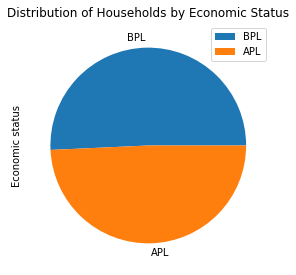

In [21]:
print("Number of households in")
print("-----------------------")
hh_by_eco_status_cnt = raw_data["Economic status"].value_counts()
print(hh_by_eco_status_cnt)
print("-----------------------")
print("% of households in")
print("-----------------------")
hh_by_eco_status_pct = raw_data["Economic status"].value_counts(normalize=True)*100
print(hh_by_eco_status_pct)
print("-----------------------")
hh_by_eco_status_pct.plot.pie(figsize=[8,4.5], 
                          title="Distribution of Households by Economic Status",
                          legend=True)

#### Observations:
1. Distribution of households by economic status is quite even, i.e. there are almost 50% BPL and 50% APL families where verification of toilet has been conducted.

### Households by Social Category

Number of households in
-----------------------
ST                          2203392
GENERAL                     2096241
Other                       2003471
SC                          1319150
Small & Marginal Farmers     902280
Women Headed HH              205095
Landless with homestead       75243
PH                            26907
Name: Sub-category, dtype: int64
-----------------------
% of households in
-----------------------
ST                          24.948450
GENERAL                     23.735207
Other                       22.684795
SC                          14.936402
Small & Marginal Farmers    10.216288
Women Headed HH              2.322239
Landless with homestead      0.851957
PH                           0.304661
Name: Sub-category, dtype: float64
-----------------------


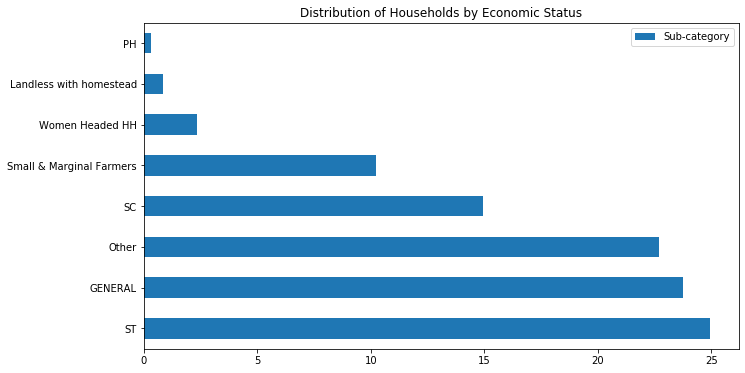

In [22]:
print("Number of households in")
print("-----------------------")
hh_by_sco_catgry_cnt = raw_data["Sub-category"].value_counts()
print(hh_by_sco_catgry_cnt)
print("-----------------------")
print("% of households in")
print("-----------------------")
hh_by_sco_catgry_pct = raw_data["Sub-category"].value_counts(normalize=True)*100
print(hh_by_sco_catgry_pct)
print("-----------------------")
hh_by_sco_catgry_pct.plot.barh(figsize=[10.66,6], 
                          title="Distribution of Households by Economic Status",
                          legend=True)

### Households by Economic Status and Social Category

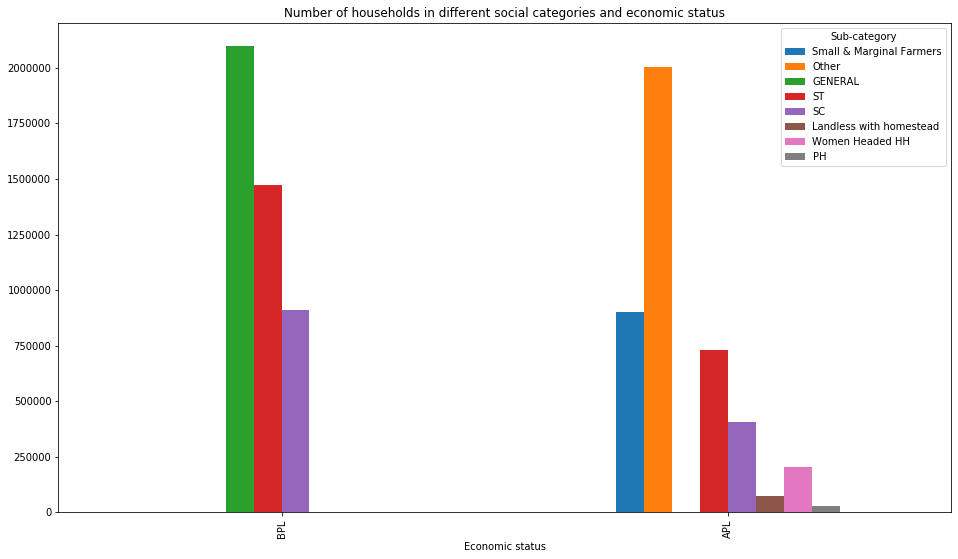

In [23]:
pd.crosstab(index=raw_data["Economic status"], 
                          columns=raw_data["Sub-category"]).plot.bar(figsize=[16,9],
                                                                    title="Number of households in different social categories and economic status",
                                                                    table=False)

#### Observations - 
1. There are 22.7% households in "Others" category
2. All the General category households are BPL
3. BPL Households has only General,  SC and ST category. No landless family, or household headed by a woman or physically challenged person has been reported as BPL.

## 2. Status of Toilets in Households

### Availability of Toilets in the Households

In [24]:
print("Number of households having toilet")
print("-----------------------")
hh_hvng_tlt_cnt = raw_data["Has Toilet"].value_counts()
print(hh_hvng_tlt_cnt)
print("-----------------------")
print("% of households haing toilet")
print("-----------------------")
hh_hvng_tlt_pct = raw_data["Has Toilet"].value_counts(normalize=True)*100
print(hh_hvng_tlt_pct)
print("-----------------------")

Number of households having toilet
-----------------------
हाँ     8376583
नहीं     455196
Name: Has Toilet, dtype: int64
-----------------------
% of households haing toilet
-----------------------
हाँ     94.845931
नहीं     5.154069
Name: Has Toilet, dtype: float64
-----------------------


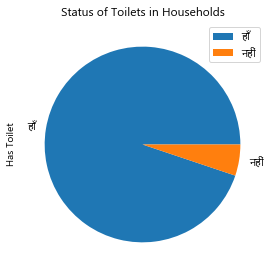

In [25]:
plt.rcParams['font.family']='Nirmala UI'

hh_hvng_tlt_pct.plot.pie(figsize=[8,4.5], 
                          title="Status of Toilets in Households",
                          legend=True)

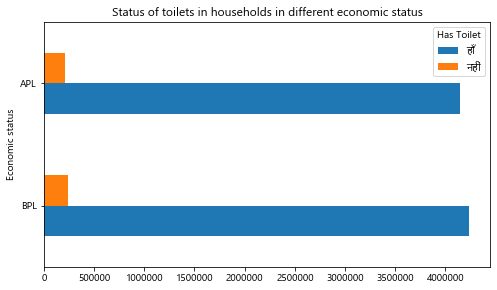

In [26]:
pd.crosstab(index=raw_data["Economic status"], 
                          columns=raw_data["Has Toilet"]).plot.barh(figsize=[8,4.5],
                                                                    title="Status of toilets in households in different economic status",
                                                                    table=False)

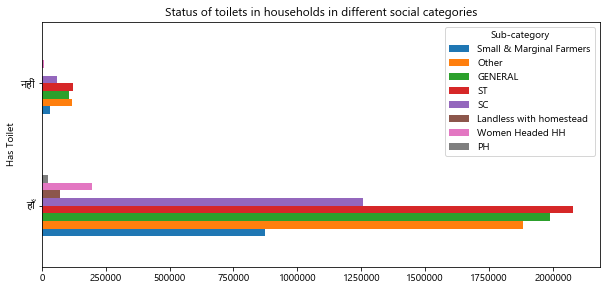

In [27]:
pd.crosstab(index=raw_data["Has Toilet"], 
                          columns=raw_data["Sub-category"]).plot.barh(figsize=[10,4.5],
                                                                    title="Status of toilets in households in different social categories",
                                                                    table=False)

#### Observations:
1. 94.85% of the housheolds have toilet
2. However 4.55 lakh households are still devoid of toilet facility. ST households are the most affected

### Availabilty of Different Types of Toilet across Households

In [28]:
hh_with_toilet = raw_data[(raw_data["Has Toilet"] == 'हाँ') & (raw_data["Type of toilet"] != 'उपलब्ध नहीं है')]

In [29]:
print("Number of households having different types toilet")
print("--------------------------------------------------")
hh_hvng_tlt_type_cnt = hh_with_toilet["Type of toilet"].value_counts()
print(hh_hvng_tlt_type_cnt)
print("--------------------------------------------------")
print("% of households haing different types of toilet")
print("--------------------------------------------------")
hh_hvng_tlt_type_pct = hh_with_toilet["Type of toilet"].value_counts(normalize=True)*100
print(hh_hvng_tlt_type_pct)
print("--------------------------------------------------")

Number of households having different types toilet
--------------------------------------------------
एक गड्ढे वाला                      3756730
दो गड्ढे वाला                      2654140
सेप्टिक टैंक                       1598559
सोखते गड्ढे के साथ सेप्टिक टैंक     345090
बायो-शौचालय                          13231
उपलब्ध नहीं है                           0
Name: Type of toilet, dtype: int64
--------------------------------------------------
% of households haing different types of toilet
--------------------------------------------------
एक गड्ढे वाला                      44.895342
दो गड्ढे वाला                      31.718682
सेप्टिक टैंक                       19.103809
सोखते गड्ढे के साथ सेप्टिक टैंक     4.124048
बायो-शौचालय                         0.158119
उपलब्ध नहीं है                      0.000000
Name: Type of toilet, dtype: float64
--------------------------------------------------


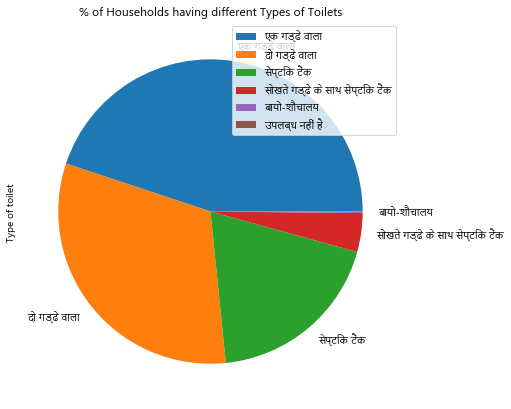

In [30]:
hh_hvng_tlt_type_pct.plot.pie(figsize=[10,7], 
                          title="% of Households having different Types of Toilets",
                          legend=True)

## 3. Status of Water Sources in the Households

### Availability of Water Source in the Households

In [31]:
print("Number of households having water source")
print("-----------------------")
hh_hvng_wtr_src_cnt = raw_data["Has Water Source"].value_counts()
print(hh_hvng_wtr_src_cnt)
print("-----------------------")
print("% of households haing water source")
print("-----------------------")
hh_hvng_wtr_src_pct = raw_data["Has Water Source"].value_counts(normalize=True)*100
print(hh_hvng_wtr_src_pct)
print("-----------------------")

Number of households having water source
-----------------------
हाँ     7839744
नहीं     992035
Name: Has Water Source, dtype: int64
-----------------------
% of households haing water source
-----------------------
हाँ     88.767439
नहीं    11.232561
Name: Has Water Source, dtype: float64
-----------------------


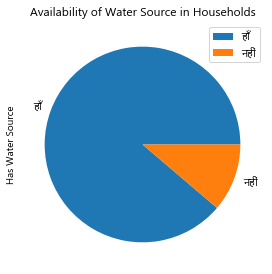

In [32]:
hh_hvng_wtr_src_pct.plot.pie(figsize=[8,4.5], 
                          title="Availability of Water Source in Households",
                          legend=True)

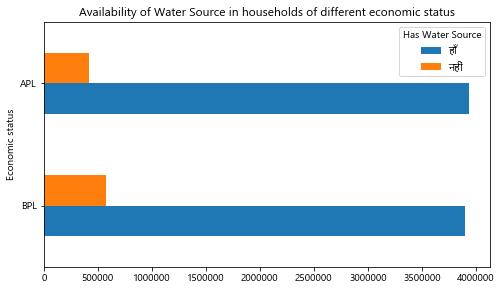

In [33]:
pd.crosstab(index=raw_data["Economic status"], 
                          columns=raw_data["Has Water Source"]).plot.barh(figsize=[8,4.5],
                                                                    title="Availability of Water Source in households of different economic status",
                                                                    table=False)

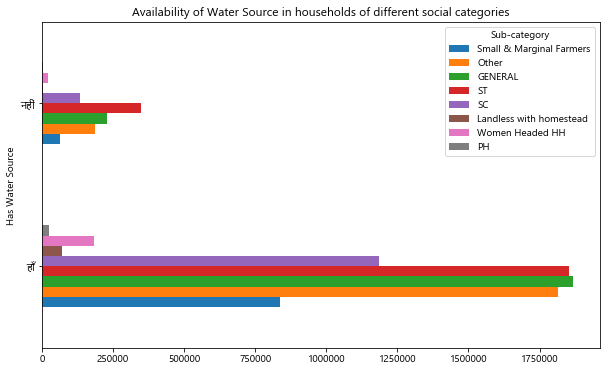

In [34]:
pd.crosstab(index=raw_data["Has Water Source"], 
                          columns=raw_data["Sub-category"]).plot.barh(figsize=[10,6],
                                                                    title="Availability of Water Source in households of different social categories",
                                                                    table=False)

#### Observation:
1. 88.77% of the households have a water source
2. Howerver, around 9.9 Lakh Households don't have water source. ST category households are the worst affected.

### Availabilty of Different Types of Water Sources across Households

In [35]:
hh_with_wtr_src = raw_data[(raw_data["Has Water Source"] == 'हाँ') & (raw_data["Water source"] != 'उपलब्ध नहीं है') & (raw_data["Water source"] != 'पानी का कोई स्त्रोत नहीं')]

In [36]:
print("Number of households having different types of water source")
print("--------------------------------------------------")
hh_hvng_wtr_src_type_cnt = hh_with_wtr_src["Water source"].value_counts()
print(hh_hvng_wtr_src_type_cnt)
print("--------------------------------------------------")
print("% of households haing different types of water source")
print("--------------------------------------------------")
hh_hvng_wtr_src_type_pct = hh_with_wtr_src["Water source"].value_counts(normalize=True)*100
print(hh_hvng_wtr_src_type_pct)
print("--------------------------------------------------")

Number of households having different types of water source
--------------------------------------------------
हैंडपंप                     4154364
नल-जल                       2232978
कुआँ                        1098231
तालाब                         31261
पानी का कोई स्त्रोत नहीं          0
उपलब्ध नहीं है                    0
Name: Water source, dtype: int64
--------------------------------------------------
% of households haing different types of water source
--------------------------------------------------
हैंडपंप                     55.267470
नल-जल                       29.706363
कुआँ                        14.610287
तालाब                        0.415880
पानी का कोई स्त्रोत नहीं     0.000000
उपलब्ध नहीं है               0.000000
Name: Water source, dtype: float64
--------------------------------------------------


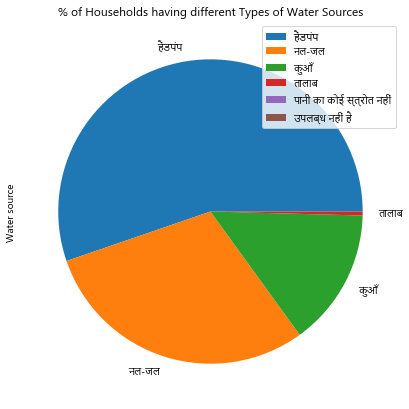

In [37]:
hh_hvng_wtr_src_type_pct.plot.pie(figsize=[10,7], 
                          title="% of Households having different Types of Water Sources",
                          legend=True)

### Availability of Toilets and Water Source in the Households

Has Toilet            हाँ    नहीं
Has Water Source                 
हाँ               7820538   19206
नहीं               556045  435990


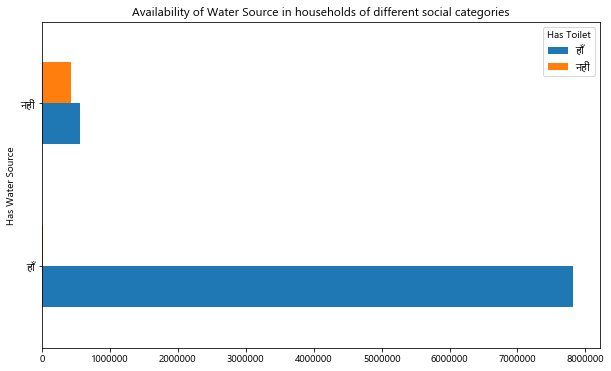

In [38]:
hh_tlt_n_wtr_src_cnt = pd.crosstab(index=raw_data["Has Water Source"], columns=raw_data["Has Toilet"])
print(hh_tlt_n_wtr_src_cnt)
hh_tlt_n_wtr_src_cnt.plot.barh(figsize=[10,6],
                               title="Availability of Water Source in households of different social categories",
                               table=False)

#### Observation:
1. Handpump is the major source of water in households (55% of households use handpumps)
2. Water Supply scheme is available in only 29.7% ~ 30% of the households and the remaining.
3. 14% of the households rely on wells
4. Around 5.56 Lakh households having toilets has no water source

# Section 3: Status of toilets across State and Districts

In [39]:
raw_data['State']= "Madhya Pradesh"

In [40]:
raw_data['% Headed by Women'] = raw_data['Sub-category'].apply(lambda x: 100 if (x=="Women Headed HH") else 0)

In [41]:
raw_data['% Headed by PH'] = raw_data['Sub-category'].apply(lambda x: 100 if (x=="PH") else 0)

In [42]:
raw_data['% Having No Toilet'] = pd.to_numeric(raw_data['Has Toilet'].apply(lambda x: 100 if (x=="नहीं") else 0))

In [43]:
raw_data['% Having No Water Source'] = pd.to_numeric(raw_data['Has Water Source'].apply(lambda x: 100 if (x=="नहीं") else 0))

In [44]:
raw_data['Total Household'] = 1

In [45]:
raw_data['% Households having Toilet but no Water Source'] = np.where((raw_data['Has Toilet']=="हाँ") & (raw_data['Has Water Source']=='नहीं'),100,0)

In [47]:
raw_data.pivot_table(index=['State','District'], 
                     values=['Total Household', 
                             '% Headed by Women', 
                             '% Headed by PH', 
                             '% Having No Toilet', 
                             '% Having No Water Source',
                            '% Households having Toilet but no Water Source'],
                     aggfunc={'Total Household':np.sum, 
                              '% Headed by Women':np.mean, 
                              '% Headed by PH':np.mean, 
                              '% Having No Toilet':np.mean, 
                              '% Having No Water Source':np.mean,
                             '% Households having Toilet but no Water Source':np.mean},
                    margins=True)

% Having No Toilet  % Having No Water Source  \
State          District                                                    
Madhya Pradesh AGAR MALWA             3.833214                  6.150549   
               ALIRAJPUR              0.953950                  3.419390   
               ANUPPUR                3.615544                 21.898702   
               ASHOKNAGAR             1.028340                  4.421422   
               BALAGHAT               6.258527                 12.600819   
               BARWANI                9.419350                 17.138339   
               BETUL                  3.776404                  8.786625   
               BHIND                  2.586091                  3.218545   
               BHOPAL                 1.849356                  3.531161   
               BURHANPUR              4.769387                 10.227891   
               CHHATARPUR             9.499232                 20.025465   
               CHHINDWARA             1.798628                  5.060058   
               DAMOH                  7.731420                 18.816605   
               DATIA                  4.531905                  5.863504   
               DEWAS                  4.204655                  6.218983   
               DHAR                   0.981030                  2.619847   
               DINDORI                7.841088                 20.269864   
               GUNA                   7.025674                 16.065921   
               GWALIOR                1.218779                  1.913615   
               HARDA                  1.936637                  5.483277   
               HOSHANGABAD            2.428676                  5.937459   
               INDORE                 0.330745                  0.703235   
               JABALPUR              23.269883                 33.754946   
               JHABUA                 1.891071                  8.230995   
               KATNI                  4.100503                 11.610048   
               KHANDWA                3.766577                  6.912098   
               KHARGONE               9.291793                 17.694603   
               MANDLA                 8.537025                 24.460321   
               MANDSAUR               2.998116                  6.154085   
               MORENA                 3.182942                  4.502400   
               NARSINGHPUR            1.229253                  3.658556   
               NEEMUCH                2.532216                  9.063230   
               PANNA                  5.980607                 12.085364   
               RAISEN                 3.004990                  5.607133   
               RAJGARH                7.404013                 14.571635   
               RATLAM                 1.144240                  3.877441   
               REWA                   9.643059                 18.882125   
               SAGAR                  2.100045                  6.451079   
               SATNA                  8.907510                 22.415462   
               SEHORE                 1.255013                  4.216013   
               SEONI                 15.107854                 27.777583   
               SHAHDOL                1.656705                  7.102718   
               SHAJAPUR               0.628987                  1.609793   
               SHEOPUR                1.033273                  1.548867   
               SHIVPURI               8.493930                 14.273378   
               SIDHI                  4.524185                 13.293284   
               SINGROULI              4.607921                 19.394490   
               TIKAMGARH              1.536847                  3.471882   
               UJJAIN                 2.054726                  3.184233   
               UMARIA                 6.991193                 19.559731   
               VIDISHA                7.955889                 12.889580   


#### Observations
1. In Jabalpur 23.27% of the households do not have toilet, followed by Seoni with 15.1% such households
2. Again, Jabalpur and Seoni are the two districts with highest % of households without any source of water (with 33.75% and 27.78% respectively)
3. Anuppur and Mandala districts have the highest proportion of households having a toilet but no water source (with 18.37% and 16.2% respectively)